<h3 align="center"> Iowa Liquor Sales Regression Analysis</h3> 



Predicting demand is a common problem for retailers in every domain across the country. It is not only useful to predict revenue and cash flow, but also in the interest of optimizing a supply chain. The aim of this project is to investigate patterns of liquor sales in the supermarket chain Hy-Vee. This would help stakeholders prepare supply chains for certain time periods of the year and/or plan for economic resilience.

By using data from the State of Iowa on the Liquor Sales over the last 10 years, I created a random forest model that can predict the volume of liquor sold in a given week of the year across Hy-vee Supermarkets. The tool I created can be used to predict demand given the season and socio-economic condition of the State. 

### Sourcing the Data

My raw dataset was downloaded in the form of a .csv file from the State of Iowa data.gov website, and its original dimensions were 19,445,831 rows and 24 columns. Since I was only interested in predicting the volume sold by a particular supermarket chain, I narrowed down the datasets to only observations from Hy-Vee Supermarkets. This reduced the file to (6458510, 24). I also downloaded another dataset from the same website that contained numbers of unemployment claims by county over the same time period. I merged these two datasets together on county, adding an additional column. 

### Data Wrangling

The dataset required extensive data wrangling work. The steps performed included:
- checking for missing values
- changing column names to lowercase
- filtering down to only Hy-Vee Supermarkets
- grouping the dataframe by week and county

As these are routine data transformations and in the interest of space, code used to wrangle the raw data can be found in a separate file (titled: Data Wrangling)

Below I show the steps for two wrangling procedures:
- grouping cities by whether they are large or small ( top 3 in the state )
- grouping counties on whether they are urban or rural


In [338]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats

In [339]:
df = pd.read_csv('liquor_dataset_.csv' , index_col = 0, dtype={'week': object, 'store_number': object})

Given that we had way too many counties to be able to deal with, will group by urban and rural based on number of inhabitants.

1	Polk County	479,612

2	Linn County	223,861

3	Scott County	172,446

4	Johnson County	148,577

5	Black Hawk County	132,393

In [340]:
urban = ['POLK', 'LINN', 'SCOTT', 'JOHNSON', 'BLACK HAWK']

rural = ['STORY','BOONE', 'DES MOINES',
       'CERRO GORDO', 'JASPER', 'MONTGOMERY', 'DICKINSON', 'APPANOOSE',
       'DUBUQUE', 'WEBSTER', 'HARDIN', 'WAPELLO',
       'MARSHALL', 'WARREN', 'CLARKE', 'LUCAS', 'UNION', 'LEE',
       'EMMET', 'HENRY', 'MONROE', 'CLAY', 'MARION', 'MUSCATINE',
       'BUENA VISTA', 'FLOYD', 'POWESHIEK', 'WASHINGTON', 'KOSSUTH',
       'CASS', 'CARROLL', 'WOODBURY', 'CRAWFORD', 'CHEROKEE', 'MAHASKA',
       'JEFFERSON', 'HAMILTON', 'PLYMOUTH', 'HUMBOLDT', 'PAGE', 'DALLAS',
       'POTTAWATTAMIE', 'CLINTON', 'SHELBY', 'BREMER', 'CLAYTON', 'ADAMS',
       'TAYLOR', 'RINGGOLD', 'WAYNE', "O'BRIEN", 'DECATUR', 'GREENE',
       'MADISON', 'WINNEBAGO', 'HANCOCK', 'TAMA', 'PALO ALTO', 'BENTON',
       'HOWARD', 'FRANKLIN', 'ALLAMAKEE']

In [341]:
df['county'] = df['county'].replace(to_replace = urban, value ='urban')
df['county'] = df['county'].replace(to_replace = rural, value = 'rural')

Same thing is done for Cities in Iowa. The three major cities in the state are Des Moines, Cedar Rapids and Davenport.

In [342]:
large = ['DES MOINES', 'CEDAR RAPIDS', 'DAVENPORT']

small = ['AMES', 'ANKENY', 'BOONE', 'BURLINGTON', 
       'IOWA CITY', 'MARION', 'MASON CITY', 'NEWTON', 'RED OAK',
       'WEST DES MOINES', 'SPIRIT LAKE', 'CENTERVILLE', 'DUBUQUE',
        'URBANDALE', 'FORT DODGE', 'WATERLOO', 'IOWA FALLS',
       'OTTUWMA', 'OTTUMWA', 'MARSHALLTOWN', 'ALTOONA', 'INDIANOLA',
       'OSCEOLA', 'CHARITON', 'CRESTON', 'KEOKUK',
       'ESTHERVILLE', 'MOUNT PLEASANT', 'ALBIA', 'SPENCER', 'KNOXVILLE',
       'CEDAR FALLS', 'MUSCATINE', 'STORM LAKE', 'CHARLES CITY',
       'GRINNELL', 'WASHINGTON', 'FORT MADISON', 'ALGONA', 'JOHNSTON',
       'ATLANTIC', 'CARROLL', 'SIOUX CITY', 'DENISON', 'CHEROKEE',
       'CORALVILLE', 'OSKALOOSA', 'FAIRFIELD', 'WEBSTER CITY',
       'BETTENDORF', 'LEMARS', 'LE MARS', 'HUMBOLDT', 'SHENANDOAH',
       'PERRY', 'COUNCIL BLUFFS', 'CLINTON', 'WINDSOR HEIGHTS', 'ELDORA',
       'PELLA', 'HARLAN', 'WAVERLY', 'CLARINDA', 'CORNING', 'BEDFORD',
       'MOUNT AYR', 'CORYDON', 'SHELDON', 'WAUKEE', 'LEON', 'JEFFERSON',
       'WINTERSET', 'LAMONI', 'FOREST CITY', 'GARNER', 'TOLEDO',
       'EMMETSBURG', 'PLEASANT HILL', 'CLIVE', 'VINTON', 'CRESCO',
       'HAMPTON', 'WAUKON', 'DYERSVILLE']

In [343]:
df['city'] = df['city'].replace(to_replace = large, value ='large')
df['city'] = df['city'].replace(to_replace = small, value ='small')

In [344]:
df.head()

,week,general_alcohol_category,city,county,initial claims,volume
0,1,amaretto,small,rural,167.0,6.75
1,1,amaretto,small,rural,248.0,3.75
2,1,amaretto,small,rural,306.0,2.25
3,1,brandy,small,rural,159.0,33.73
4,1,brandy,small,rural,167.0,33.80


In [345]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 477063 entries, 0 to 477062
Data columns (total 6 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   week                      477063 non-null  object 
 1   general_alcohol_category  477063 non-null  object 
 2   city                      477063 non-null  object 
 3   county                    477063 non-null  object 
 4   initial claims            477063 non-null  float64
 5   volume                    477063 non-null  float64
dtypes: float64(2), object(4)
memory usage: 25.5+ MB


### Exploratory Data analysis

The aim of exploratory data analysis is to look at the relationship between different predictor variables and the target variable to see whether there is evidence of any relationship. As most of my data are categorical, I primarily used boxplots to look at the distributions.

#### Liquor type

,mean,std
general_alcohol_category,,
amaretto,12.015031,11.984689
bourbon,4.070879,5.905013
brandy,27.163489,29.085454
cocktail,58.489247,105.421960
creme,6.170168,7.648201
gin,39.497795,50.732965
other,130.551694,210.387576
rum,155.303484,248.262948
scotch,9.633912,16.332593


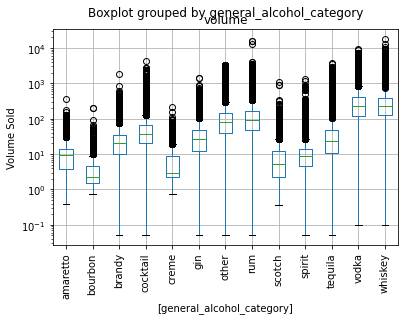

In [346]:
df.boxplot(column=['volume'],by = ['general_alcohol_category'], rot=90).set_yscale('log')
plt.ylabel("Volume Sold")
pd.DataFrame(df.groupby( ['general_alcohol_category'])['volume'].describe().loc[:,['mean','std']])

Here, I chose to do an ANOVA to see whether the means are statistically different.

In [347]:
import statsmodels.api as sm
from statsmodels.formula.api import ols

mod = ols('volume ~ general_alcohol_category', data = df).fit()

aov_table = sm.stats.anova_lm(mod, typ=2)
print(aov_table)

                                sum_sq        df             F  PR(>F)
general_alcohol_category  7.463349e+09      12.0  10581.036787     0.0
Residual                  2.804065e+10  477050.0           NaN     NaN


The ANOVA suggests that we can reject the null hypothesis that the means of sales volume across liquor categories are equal and accept the alternative hypothesis that at least one mean is different from the others. This is not surprising from looking at the boxplots and considering that different types of liquor are sold in different kinds of bottles. There is reasonable basis for including this variable in the model. 

#### Locations

Since there are 99 counties in Iowa and 200+ cities, I chose to feature engineer this data grouping it into two categories: large vs. small city and urban vs. rural county. I chose the threshold for each to be 100,000 residents.

,mean,std
city,,
large,162.042567,385.729939
small,113.910488,227.782107


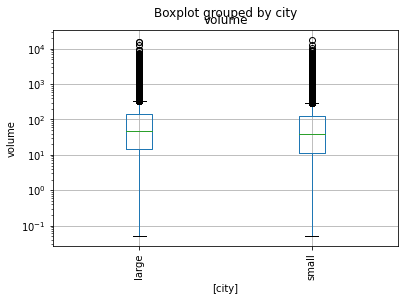

In [348]:
df.boxplot(column=['volume'],by = ['city'], rot=90).set_yscale('log')
plt.ylabel("volume")
pd.DataFrame(df.groupby(['city'])['volume'].describe().loc[:,['mean','std']])

In [349]:
data1 = df[df['city'] == 'large']['volume']
data2 = df[df['city'] == 'small']['volume']

results = statsmodels.stats.weightstats.ttest_ind(data1, data2, alternative='two-sided', usevar='pooled', weights=(None, None), value=0)

print('t-statistic: ' + str(results[0]) + ' p-value: ' + str(results[1]) + ' degrees of freedom: ' + str(results[2]))

t-statistic: 51.296537982761535 p-value: 0.0 degrees of freedom: 477061.0


The result indicates that we should reject the null hypothesis that the means of liquor consumption in large and small cities are equal and accept the alternative hypothesis that they are different. This provides reasonable basis for us to include the variable 'city' in the model.


,mean,std
county,,
rural,100.733770,191.170189
urban,153.392156,342.885785


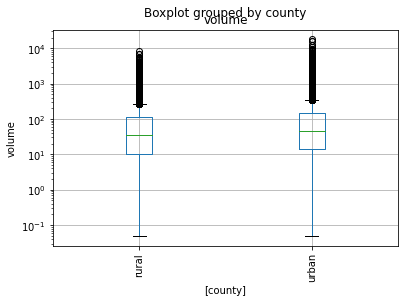

In [350]:
df.boxplot(column=['volume'],by = ['county'], rot=90).set_yscale('log')
plt.ylabel("volume")
pd.DataFrame(df.groupby(['county'])['volume'].describe().loc[:,['mean','std']])

In [351]:
import statsmodels.stats.weightstats

In [352]:
data1 = df[df['county'] == 'rural']['volume']
data2 = df[df['county'] == 'urban']['volume']

results = statsmodels.stats.weightstats.ttest_ind(data1, data2, alternative='two-sided', usevar='pooled', weights=(None, None), value=0)

print('t-statistic: ' + str(results[0]) + ' p-value: ' + str(results[1]) + ' degrees of freedom: ' + str(results[2]))

t-statistic: -66.7459401284296 p-value: 0.0 degrees of freedom: 477061.0


The result indicates that we should reject the null hypothesis that the means of liquor consumption in rural and urban counties are equal and accept the alternative hypothesis that they are different. Similarily, this provides reasonable basis for us to include the variable county in the model. 

I grouped the data by week and feature engineered 'week of the year' as a categorical variable. There appear to be differences in the volumes sold each week judging by the graph below.

,mean,std
week,,
1,103.681853,203.754095
10,124.685821,281.254942
11,111.226696,246.668137
12,108.145310,225.657303
13,98.352839,199.404592
14,131.596770,270.029303
15,127.132279,249.214555
16,118.654832,243.734038
17,118.317716,260.239032


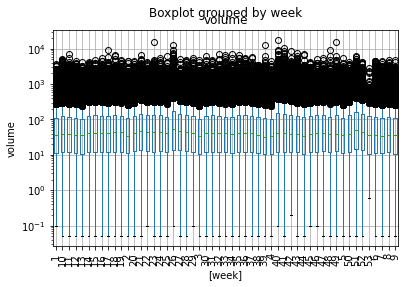

In [353]:
df.boxplot(column=['volume'],by = ['week'], rot=90).set_yscale('log')
plt.ylabel("volume")
pd.DataFrame(df.groupby(['week'])['volume'].describe().loc[:,['mean','std']])

### Preprocessing

The target variable will be the volume of alcohol sold in liters. Given that all the other variables are categorical, they will need to be converted into dummy variables.

#### dummy variables

In [354]:
df = pd.concat([df.drop('general_alcohol_category', axis=1), pd.get_dummies(df['general_alcohol_category'])], axis=1)
df = pd.concat([df.drop('city', axis = 1),pd.get_dummies(df['city'])], axis=1)
df = pd.concat([df.drop('county', axis = 1), pd.get_dummies(df['county'])], axis=1)
df = pd.concat([df.drop('week', axis = 1), pd.get_dummies(df['week'])], axis=1)

"Week of the year" when treated as a categorical variable impacted dimensions of the dataset the most. Given that my dataset was still very large (over 400,000 observations) I felt the benefit still outweighed the cost.

In [355]:
df.shape

(477063, 72)

#### train test split

In [365]:
from sklearn.model_selection import train_test_split

X = df.drop(['volume'], axis =1)
y = df[['volume']]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state = 123)


#### deciding on the size of the dataset needed

I have a fairly large dataset which is going to take awhile to run my models. However, it is possible that I can achieve similar results with a smaller dataset. I'm first going to make an untuned decision tree model, train it on various dataset sizes and then plot performance as a function of the size of the dataset and pick the dataset of the smallest size at which close to optimal results can be achieved.

sizes of the dataset to be tested = [5000, 15,000, 50,000, 100,000, entire dataset ]

In [366]:
df.shape

(477063, 72)

In [367]:
from sklearn.tree import DecisionTreeRegressor
import time

values = [5000, 15000, 50000, 100000, 477063]
results = []
times = []

In [368]:
#5000 samples

X_train_1 = X_train.sample(3750)
X_test_1 = X_test.sample(1250)
y_train_1 = y_train.sample(3750)
y_test_1 = y_test.sample(1250)

# Declare a variable called entr_model, and assign it: tree.DecisionTreeClassifier(criterion="entropy", random_state = 1234)
entr_model = DecisionTreeRegressor(random_state = 1234)

start = time.time()

# Call fit() on entr_model, and pass in X_train and y_train, in that order 
entr_model.fit(X_train_1, y_train_1)

stop = time.time()
time_spent = stop - start
times.append(time_spent)
print(f"Training time: {time_spent}s")
# Call predict() on entr_model with X_test passed to it, and assign the result to a variable y_pred 
y_pred = entr_model.predict(X_test_1)

# Assign y_pred the following: pd.Series(y_pred)
y_pred = pd.Series(y_pred)

# Check out entr_model
entr_model

from sklearn.metrics import r2_score
results.append(r2_score(y_test_1, y_pred))
print(r2_score(y_test_1, y_pred))

Training time: 0.07715606689453125s
-0.6083808955202119


In [369]:
#15000 samples

X_train_2 = X_train.sample(11250)
X_test_2 = X_test.sample(3750)
y_train_2 = y_train.sample(11250)
y_test_2 = y_test.sample(3750)


# Declare a variable called entr_model, and assign it: tree.DecisionTreeClassifier(criterion="entropy", random_state = 1234)
entr_model = DecisionTreeRegressor(random_state = 1234)

start = time.time()

# Call fit() on entr_model, and pass in X_train and y_train, in that order 
entr_model.fit(X_train_2, y_train_2)

stop = time.time()
time_spent = stop - start
times.append(time_spent)
print(f"Training time: {time_spent}s")
# Call predict() on entr_model with X_test passed to it, and assign the result to a variable y_pred 
y_pred = entr_model.predict(X_test_2)

# Assign y_pred the following: pd.Series(y_pred)
y_pred = pd.Series(y_pred)

# Check out entr_model
entr_model

from sklearn.metrics import r2_score
results.append(r2_score(y_test_2, y_pred))
print(r2_score(y_test_2, y_pred))

Training time: 0.26428961753845215s
-0.9216421859192505


In [370]:
#50,000 samples

X_train_3 = X_train.sample(37500)
X_test_3 = X_test.sample(12500)
y_train_3 = y_train.sample(37500)
y_test_3 = y_test.sample(12500)

# Declare a variable called entr_model, and assign it: tree.DecisionTreeClassifier(criterion="entropy", random_state = 1234)
entr_model = DecisionTreeRegressor(random_state = 1234)

start = time.time()

# Call fit() on entr_model, and pass in X_train and y_train, in that order 
entr_model.fit(X_train_3, y_train_3)

stop = time.time()
time_spent = stop - start
times.append(time_spent)
print(f"Training time: {time_spent}s")
# Call predict() on entr_model with X_test passed to it, and assign the result to a variable y_pred 
y_pred = entr_model.predict(X_test_3)

# Assign y_pred the following: pd.Series(y_pred)
y_pred = pd.Series(y_pred)

# Check out entr_model
entr_model

from sklearn.metrics import r2_score
results.append(r2_score(y_test_3, y_pred))
print(r2_score(y_test_3, y_pred))

Training time: 0.955449104309082s
-0.7242561888589367


In [371]:
#100,000 samples

X_train_4 = X_train.sample(75000)
X_test_4 = X_test.sample(25000)
y_train_4 = y_train.sample(75000)
y_test_4 = y_test.sample(25000)

# Declare a variable called entr_model, and assign it: tree.DecisionTreeClassifier(criterion="entropy", random_state = 1234)
entr_model = DecisionTreeRegressor(random_state = 1234)

start = time.time()

# Call fit() on entr_model, and pass in X_train and y_train, in that order 
entr_model.fit(X_train_4, y_train_4)

stop = time.time()
time_spent = stop-start
times.append(time_spent)
print(f"Training time: {time_spent}s")
# Call predict() on entr_model with X_test passed to it, and assign the result to a variable y_pred 
y_pred = entr_model.predict(X_test_4)

# Assign y_pred the following: pd.Series(y_pred)
y_pred = pd.Series(y_pred)

# Check out entr_model
entr_model

from sklearn.metrics import r2_score
results.append(r2_score(y_test_4, y_pred))
print(r2_score(y_test_4, y_pred))

Training time: 2.613797187805176s
-0.8542453099995173


In [372]:
#entire dataset

# Declare a variable called entr_model, and assign it: tree.DecisionTreeClassifier(criterion="entropy", random_state = 1234)
entr_model = DecisionTreeRegressor(random_state = 1234)

start = time.time()

# Call fit() on entr_model, and pass in X_train and y_train, in that order 
entr_model.fit(X_train, y_train)

stop = time.time()
time_spent = stop - start
times.append(time_spent)
print(f"Training time: {time_spent}s")
# Call predict() on entr_model with X_test passed to it, and assign the result to a variable y_pred 
y_pred = entr_model.predict(X_test)

# Assign y_pred the following: pd.Series(y_pred)
y_pred = pd.Series(y_pred)

# Check out entr_model
entr_model

from sklearn.metrics import r2_score
results.append(r2_score(y_test, y_pred))
print(r2_score(y_test, y_pred))



Training time: 12.979122161865234s
0.046561958225265876


Plotting the results of the training vs the test.

Text(0.5, 1.0, 'performance vs size of dataset')

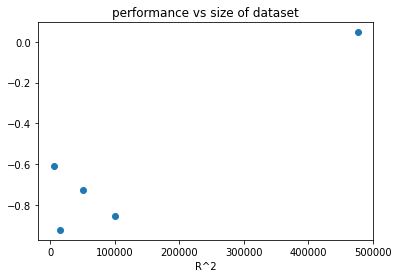

In [373]:
plt.scatter(values, results)
plt.xlabel("R^2")
plt.title("performance vs size of dataset")

From this graph we see that performance of the model is rather bad. This could be for several reasons, one of which is the choice to include week of the year as a categorical variable. A future possible modification would be to engineer month and week of the month as variables, additionally reducing the dimmensionality of the dataset.  

A different reason for such low performance could be because a decision tree is a poor choice for this problem and/or the hyperparameters of the decision tree - the depth of the tree is too shallow. Other models could be tested to see whether this a problem with the data or the model, which I will see below.

To be safe, I choose to use the entire dataset for training and testing.

Text(0.5, 1.0, 'Training time vs. size of dataset')

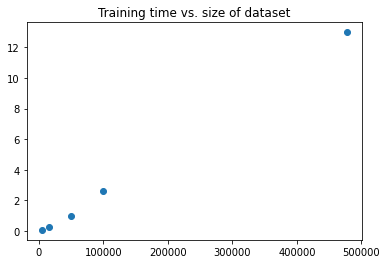

In [374]:
plt.scatter(values, times)
plt.title("Training time vs. size of dataset")

The training time for the model increases with the size of the dataset following a general linear pattern, as expected.

#### modeling

Besides decision tree, I tried two other models:




##### Linear Regression

In [375]:
from sklearn import linear_model
import sklearn.metrics as metrics
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error


rModel = linear_model.LinearRegression()

start = time.time()

model = rModel.fit(X_train, y_train)

stop = time.time()
print(f"Training time: {stop - start}s")
#prints accuracy of the model agains the training data
score = model.score(X_train, y_train)
print("Score: ", score)

y_pred = rModel.predict(X_test)


print('Mean Absolute Error:', round(metrics.mean_absolute_error(y_test, y_pred), 2))
print('Mean Squared Error:', round(metrics.mean_squared_error(y_test, y_pred), 2))
print('Root Mean Squared Error:', round(np.sqrt(metrics.mean_squared_error(y_test, y_pred)), 2))

Training time: 3.909592866897583s
Score:  0.22522608001207958
Mean Absolute Error: 100.17
Mean Squared Error: 55203.25
Root Mean Squared Error: 234.95


The performance of the linear regression model is already superior to decision tree, with an R^2 value of 0.23.

##### Random Forest

In [376]:
from sklearn.ensemble import RandomForestRegressor

y = np.array(df['volume'])
X = np.array(X)

print('Training Features Shape:', X_train.shape)
print('Training Labels Shape:', y_train.shape)
print('Testing Features Shape:', X_test.shape)
print('Testing Labels Shape:', y_test.shape)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state = 123)

#scale data
from sklearn import preprocessing
import numpy as np
# build scaler based on training data and apply it to test data to then also scale the test data
scaler = preprocessing.StandardScaler().fit(X_train)
X_train_scaled=scaler.transform(X_train)
X_test_scaled=scaler.transform(X_test)

X_train_scaled.shape

rf = RandomForestRegressor(n_estimators = 10, random_state = 42)
start = time.time()
rf.fit(X_train_scaled, y_train)
stop = time.time()
print(f"Training time: {stop - start}s")

predictions = rf.predict(X_test_scaled)
score = rf.score(X_train_scaled, y_train)
print("Score: ", score)
# Calculate the absolute errors
errors = abs(predictions - y_test)
y_pred = rf.predict(X_test_scaled)
# Print out the mean absolute error (mae)
print('Mean Absolute Error:', round(np.mean(errors), 2))
print('Mean Squared Error:', round(metrics.mean_squared_error(y_test, y_pred), 2))
print('Root Mean Squared Error:', round(np.sqrt(metrics.mean_squared_error(y_test, y_pred)), 2))


feature_list = list(df.columns)


# Get numerical feature importances
importances = list(rf.feature_importances_)
# List of tuples with variable and importance
feature_importances = [(feature, round(importance, 2)) for feature, importance in zip(feature_list, importances)]
# Sort the feature importances by most important first
feature_importances = sorted(feature_importances, key = lambda x: x[1], reverse = True)
# Print out the feature and importances 
[print('Variable: {:20} Importance: {}'.format(*pair)) for pair in feature_importances[:10]];

Training Features Shape: (357797, 71)
Training Labels Shape: (357797, 1)
Testing Features Shape: (119266, 71)
Testing Labels Shape: (119266, 1)
Training time: 77.890310049057s
Score:  0.42287927132684117
Mean Absolute Error: 103.31
Mean Squared Error: 66440.41
Root Mean Squared Error: 257.76
Variable: initial claims       Importance: 0.38
Variable: tequila              Importance: 0.16
Variable: vodka                Importance: 0.16
Variable: small                Importance: 0.04
Variable: other                Importance: 0.03
Variable: gin                  Importance: 0.02
Variable: whiskey              Importance: 0.02
Variable: large                Importance: 0.01
Variable: 25                   Importance: 0.01
Variable: 4                    Importance: 0.01


The performance for Random Forest is even better, 0.423. However, a disadvantage is that the model took significantly longer to train: 70 seconds vs 6 seconds for linear regression. It is also more complex and more difficult to explain feature importance.

Note: scaling of features in a random forest model is not necessary.

#### model selection

The first most important criteria for model selection is based on the model assumptions, advantages and disadvantages

Secondly, we look at performance and lastly training time. I chose MAE as a performance metric because in this scenario I would like to downplay the significance of outliers.

Based on my results: 


|  | Decision Tree | Linear Regression | Random Forest |
| --- | --- | --- | --- |
| Advantages |  High accuracy | Simple interpretation | Can handle many predictors |
| Disadvantages | Prone to overfitting | Prone to underfitting | Complex & long training period |
| Performance (MAE) | 126.33 | 100.17| 103.31 |
| Training Time | 15.188100099563599s |  5.974484920501709s| 69.99898076057434s |


#### hyperparameter tuning

once I have chosen random forest as my model of choice, I will perform hyperparameter tuning to see how much model performance can be improved

In [377]:
param_grid = {
    'max_depth': [3,5], 
    'n_estimators': [10,40,60]
}

from sklearn.model_selection import GridSearchCV
grid_search = GridSearchCV(estimator = rf, param_grid = param_grid, 
                          cv = 2, n_jobs = -1, verbose = 2)
start = time.time()
grid_search.fit(X_train_scaled, y_train)
stop = time.time()
timespent = start-stop
print("Training time: ", timespent)
print(grid_search.best_params_)

entr_model.get_params().keys()

Fitting 2 folds for each of 6 candidates, totalling 12 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  12 out of  12 | elapsed:  5.8min remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  12 out of  12 | elapsed:  5.8min finished


Training time:  -478.85259985923767
{'max_depth': 5, 'n_estimators': 40}


dict_keys(['criterion', 'max_depth', 'max_features', 'max_leaf_nodes', 'min_impurity_decrease', 'min_impurity_split', 'min_samples_leaf', 'min_samples_split', 'min_weight_fraction_leaf', 'presort', 'random_state', 'splitter'])

In [378]:
grid_search.best_params_

{'max_depth': 5, 'n_estimators': 40}

Training the final model with the final chosen hyperparameters ( 40 trees and max depth of 5 ) The resulting performance is : Mean Absolute Error: 92.91 Liters

In [379]:
rf = RandomForestRegressor(n_estimators = 40, max_depth = 5, random_state = 42)
start = time.time()
rf.fit(X_train_scaled, y_train)
stop = time.time()
print(f"Training time: {stop - start}s")

predictions = rf.predict(X_test_scaled)
score = rf.score(X_train_scaled, y_train)
print("Score: ", score)
# Calculate the absolute errors
errors = abs(predictions - y_test)
y_pred = rf.predict(X_test_scaled)
# Print out the mean absolute error (mae)
print('Mean Absolute Error:', round(np.mean(errors), 2))
print('Mean Squared Error:', round(metrics.mean_squared_error(y_test, y_pred), 2))
print('Root Mean Squared Error:', round(np.sqrt(metrics.mean_squared_error(y_test, y_pred)), 2))


feature_list = list(df.columns)


# Get numerical feature importances
importances = list(rf.feature_importances_)
# List of tuples with variable and importance
feature_importances = [(feature, round(importance, 2)) for feature, importance in zip(feature_list, importances)]
# Sort the feature importances by most important first
feature_importances = sorted(feature_importances, key = lambda x: x[1], reverse = True)
# Print out the feature and importances 
[print('Variable: {:20} Importance: {}'.format(*pair)) for pair in feature_importances[:10]];

Training time: 134.86350989341736s
Score:  0.25435330585162585
Mean Absolute Error: 92.91
Mean Squared Error: 53282.18
Root Mean Squared Error: 230.83
Variable: vodka                Importance: 0.36
Variable: tequila              Importance: 0.35
Variable: small                Importance: 0.09
Variable: initial claims       Importance: 0.06
Variable: other                Importance: 0.05
Variable: gin                  Importance: 0.04
Variable: whiskey              Importance: 0.01
Variable: 25                   Importance: 0.01
Variable: 4                    Importance: 0.01
Variable: 40                   Importance: 0.01


#### Shortcomings and Limitations of the Analysis

There are some limitations and shortcomings of this analysis that could lead way to opportunities to dive deeper into how the unemployment rate impacts volumes of liquor sales.
	
Firstly, a better proxy for socioeconomic condition in the state could be found rather than using unemployment claims. This is only one measure of condition and unlikely to fluctuate by week of the year, but follows its own timeline. It would be better to include more features that measure this.

Similarily, grouping the data by week of the year was not a good decision, leading to a dataset of large dimensions and providing little information. Grouping data by other time intervals could be explored.
    
Another area for improvement could have been a closer analysis of the outliers. I found that the volumes of purchases varied greatly, likely because of a variety of customers ranging from individual buyers to bar and restaurant purchasers. More extensive outlier detection methods could be explored.
